# Face Detection using MTCNN

## Setup

In [ ]:
# Face detection modules 
!pip install mtcnn
from mtcnn.mtcnn import MTCNN

# Visualisation modules
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# system modules
import os
from google.colab import drive

# Colab print setup - wrap text
from IPython.display import HTML, display

def set_css():
  display(HTML('''<style>pre { white-space: pre-wrap; }</style>'''))
get_ipython().events.register('pre_run_cell', set_css)

drive.mount('here')

     |████████████████████████████████| 2.3 MB 8.3 MB/s 
Mounted at here


## 1) Load image
Make sure that you are passing in image files only to ```cv2.imread```. It sometimes happens that some none-image files sneak into your directory without your knowledge.

In [ ]:
ROOT_DIR = "/content/here/MyDrive/2021 Face Recognition/19062842/S001/L1/E01/"
extension = 'jpg'

files = os.listdir(ROOT_DIR)
file_list = [file_ for file_ in files if extension in file_]
image_name_list = []

# Obtain a list of image object with facial data 
# array of image vectors
face_arrays = []

# Load and test-print images
for image_file in file_list:
    image_name_list.append(image_file)
    print(ROOT_DIR + image_file)
    img = cv2.imread(ROOT_DIR + image_file)
    face_arrays.append(img)
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2_imshow(img)

# RGB - BGR conversion is not needed for some reason :P . The images render well.

## 2) Detect the face
- ```detect_faces()```

In [ ]:
# Create an mtcnn model.
mtcnn = MTCNN()

face_dicts = []

# Detect faces using "detect_faces" function
for face_array in (face_arrays):
  facial_features = mtcnn.detect_faces(face_array)
  face_dicts.append(facial_features)
  print(f'# of faces detected: {len(facial_features)}')
  print(facial_features)

# of faces detected: 0
[]
# of faces detected: 0
[]
# of faces detected: 1
[{'box': [128, 63, 73, 101], 'confidence': 0.9870308041572571, 'keypoints': {'left_eye': (153, 101), 'right_eye': (188, 101), 'nose': (174, 122), 'mouth_left': (157, 142), 'mouth_right': (183, 142)}}]
# of faces detected: 1
[{'box': [144, 58, 71, 97], 'confidence': 0.9519384503364563, 'keypoints': {'left_eye': (159, 99), 'right_eye': (193, 103), 'nose': (173, 124), 'mouth_left': (160, 136), 'mouth_right': (187, 138)}}]
# of faces detected: 0
[]
# of faces detected: 1
[{'box': [142, 59, 79, 113], 'confidence': 0.9841164946556091, 'keypoints': {'left_eye': (159, 101), 'right_eye': (195, 102), 'nose': (172, 122), 'mouth_left': (161, 144), 'mouth_right': (190, 145)}}]
# of faces detected: 1
[{'box': [121, 64, 74, 102], 'confidence': 0.9715502858161926, 'keypoints': {'left_eye': (153, 100), 'right_eye': (184, 101), 'nose': (175, 122), 'mouth_left': (156, 141), 'mouth_right': (179, 142)}}]
# of faces detected: 1
[{'bo

In [ ]:
# Overview
# You can calculate the detection fail rate at the above cell already. 
total_face_count = len(face_dicts)
detected_faces = [face for face in face_dicts if face != []]
detected_face_count = len(detected_faces)

print(f'Total face count: {total_face_count}')
detected = [face for face in detected_faces if (face != [])]
print(f'Detected face count: {detected_face_count}')
print(f'Detection rate: {detected_face_count/total_face_count*100} %')

Total face count: 20
Detected face count: 14
Detection rate: 70.0 %


## 3) Extract the face
- Box' return elements 
  - ```x, y, width, height``` = box() 
    - x, y starting from the top left corner

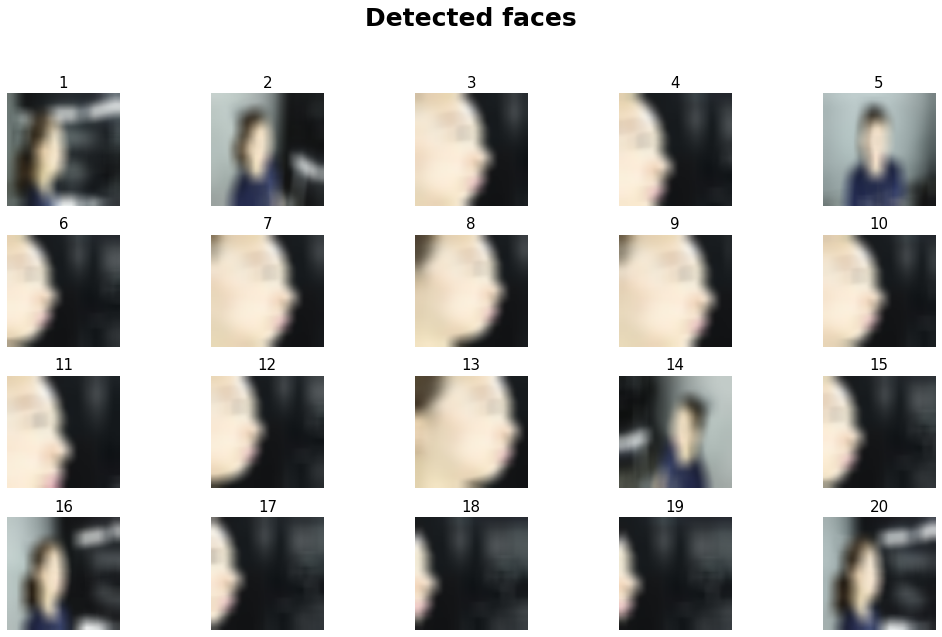

In [ ]:
index = 0
faces = []

for face_dict in face_dicts:
  # Load each image
  img_path = ROOT_DIR + image_name_list[index]
  face = cv2.imread(img_path)

  # if detection failed (no data, empty list []), print the entire image. 
  if (face_dict == []):
    face = cv2.resize(face, dsize=(80,80))

  # if detection successful, extract the face area
  else:
    x1, y1, width, height = face_dict[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    face = image[y1:y2, x1:x2]
    face = cv2.resize(face, (80,80), interpolation=cv2.INTER_AREA)

  # image is blurred for privacy protection purposes. 
  face = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
  face = cv2.GaussianBlur(face, (11, 11), sigmaX=11, sigmaY=11)
  faces.append(face)
  index += 1

fig, ax = plt.subplots(4, 5, figsize=(15, 8))
face_index = 0
for i in range(4):
  for j in range(5):
    ax[i][j].imshow(faces[face_index])
    ax[i][j].set_title(face_index+1, fontsize=15)
    ax[i][j].axis('off')
    face_index+=1

fig.suptitle('Detected faces', fontsize=25, fontweight='bold', y=1.1)
fig.tight_layout()

## 4) Box the face

Text(0.5, 0.98, 'Putting bounding boxes to detected faces')

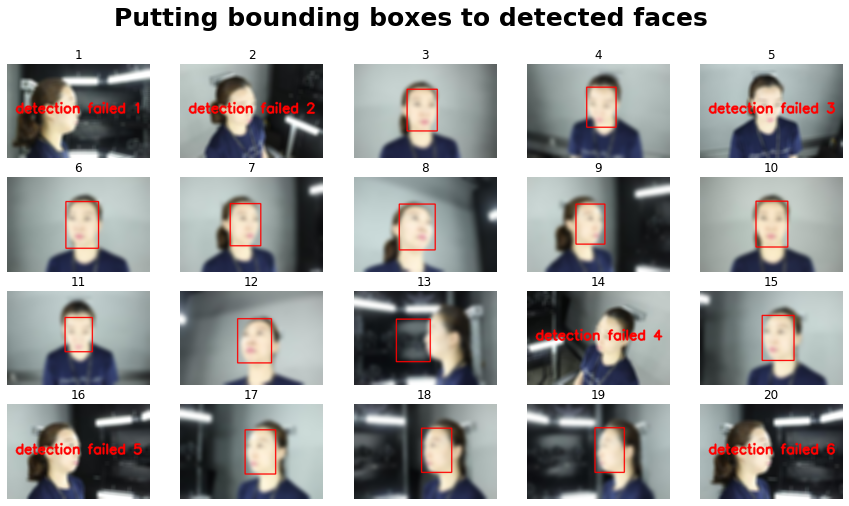

In [ ]:
fig, ax = plt.subplots(4, 5, figsize=(15, 8))

# cv2.putText parameter settings
count = 1
org = (20, 120)
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1.1
color = (255, 0, 0)
thickness = 3

i = 0
for row in range(4):
  for column in range(5):
    # Load image and pre-process (colour convesion + blur)
    image = cv2.imread(ROOT_DIR + image_name_list[i])
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.GaussianBlur(image, (11, 11), sigmaX=11, sigmaY=11)
    
    # if detection failed, label it to indicate it
    if (face_dicts[i] == []):
      text = f"detection failed {count}"
      image = cv2.putText(image, text, org, font, fontScale, color, thickness)
      count += 1

    # if detection successful, extract box information from the face_dict and draw box. 
    else: 
      x1, y1, width, height = face_dicts[i][0]['box']
      x2, y2 = x1 + width, y1 + height

      image = cv2.GaussianBlur(image, (11, 11), sigmaX=11, sigmaY=11)
      image = cv2.rectangle(image, (x1, y1), (x2, y2), (255,0,0), 2)

    ax[row][column].imshow(image)
    ax[row][column].axis('off')
    ax[row][column].set_title(i+1)
    i+=1

fig.suptitle("Putting bounding boxes to detected faces", fontsize=25, fontweight='bold')

## 5) Detect features

Text(0.5, 0.98, 'Facial landmark detection')

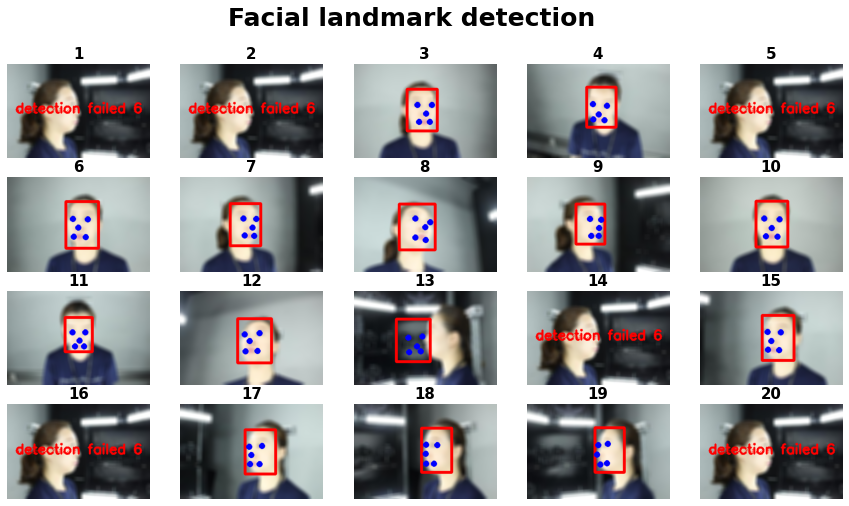

In [61]:
# circle parameters
radius = 3
color = (0, 0, 255)
thickness = 7

# putText parameters
org = (20, 120)
font = 1
fontScale = 1
font_color = (255, 0, 0)
font_thickness = 1

fig, ax = plt.subplots(4, 5, figsize=(15, 8))

count = 1
i = 0
for row in range(4):
  for column in range(5):
    face = cv2.imread(ROOT_DIR + image_name_list[i])
    face = cv2.GaussianBlur(face, (13, 13), sigmaX=11, sigmaY=11)
    face = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)

    if (face_dicts[i] == []):
      message = f"detection failed {count}"
      face = cv2.putText(image, message, org, font, fontScale, font_color, font_thickness)
      

    # if detection successful, extract landmark information from the face_dict and mark landmarks. 
    else:
      face_dict = face_dicts[i][0]
      box = face_dict['box']

      x1, y1, width, height = box
      x2, y2 = x1 + width, y1 + height

      face = cv2.rectangle(face, (x1, y1), (x2, y2), (255,0,0), 5)
      
      # Obtain landmarks of facial features
      keypoints = face_dict['keypoints']
      # Draw a circle at each of those points on the input image
      cv2.circle(face, keypoints['left_eye'], radius, color, thickness)
      cv2.circle(face, keypoints['right_eye'], radius, color, thickness)
      cv2.circle(face, keypoints['nose'], radius, color, thickness)
      cv2.circle(face, keypoints['mouth_left'], radius, color, thickness)
      cv2.circle(face, keypoints['mouth_right'], radius, color, thickness)

    ax[row][column].set_title(i+1, fontsize=15, fontweight='bold')
    ax[row][column].imshow(face)
    ax[row][column].axis('off')
    i+=1

fig.suptitle("Facial landmark detection", fontsize=25, fontweight='bold')

# Error Notes
```error: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'```
  - This means you are passing a Uninitialized variable to ```> cv2.cvtColor()```
- Can you try to print the img variable before passing to cv2.cvtColor() function
  - ```> print(img) or print(img.shape)``` to make sure function call to read the image is successful. (by [rahul4data](https://stackoverflow.com/users/11021540/rahul4data))
- This error occurs when the image is in **one format** and in the python program you specify **other format**.
  - My case: the directory contained txt file for every jpg file.

https://stackoverflow.com/questions/53926657/215assertion-failed-src-empty-in-function-cvcvtcolor

- Put text on image
  - ```cv2.putText(image, text, org, font, fontScale, color, thickness, cv2.LINE_AA, False)```